In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv("data/train.csv")
df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


<AxesSubplot:>

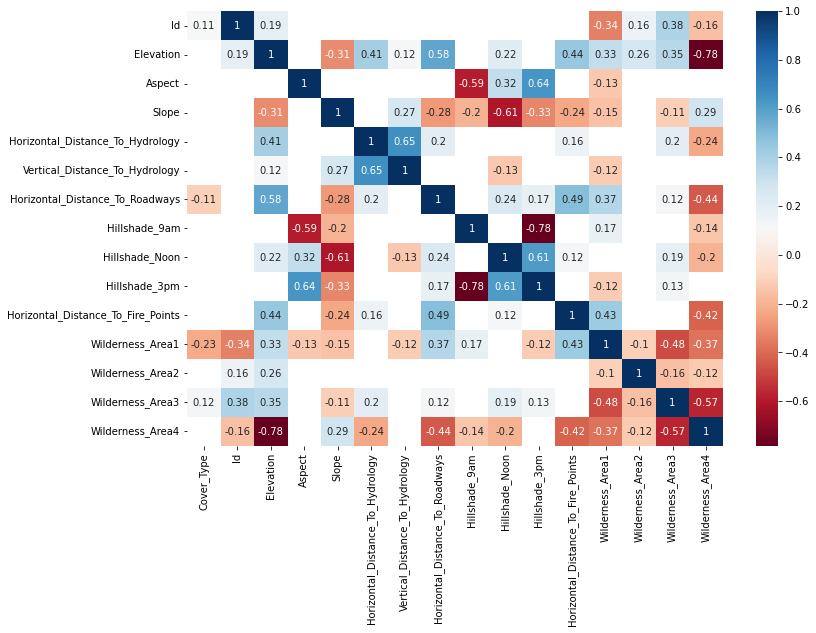

In [123]:
plt.figure(figsize=(12, 8))
cor = df.corr()
cor = cor[df.corr().abs() > 0.1]
sns.heatmap(pd.concat([cor.iloc[:15]["Cover_Type"], cor.iloc[:15, :15]], axis=1), annot=True, cmap="RdBu")

<AxesSubplot:xlabel='Elevation', ylabel='Slope'>

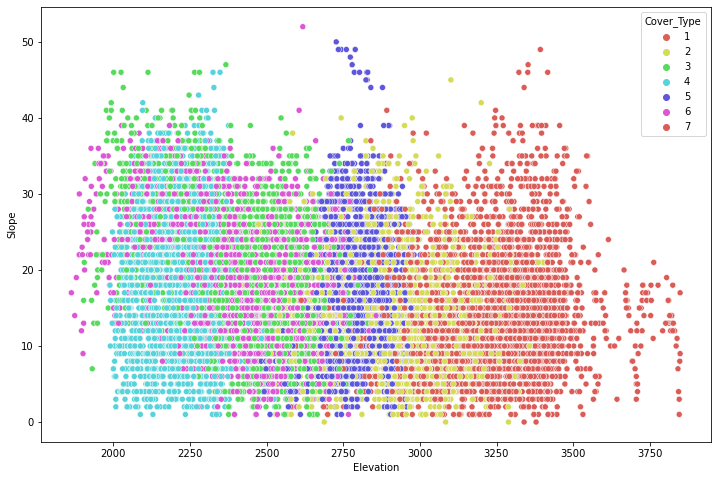

In [124]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["Elevation"], y="Slope", hue="Cover_Type", data=df, palette="hls")

<AxesSubplot:xlabel='Aspect', ylabel='Slope'>

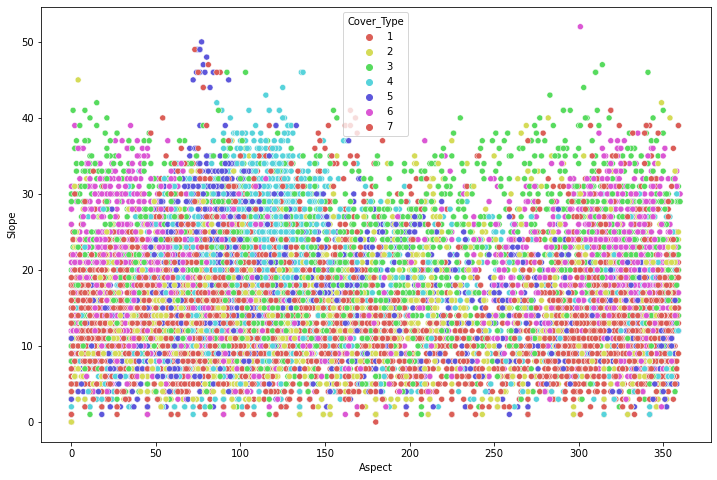

In [125]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["Aspect"], y="Slope", hue="Cover_Type", data=df, palette="hls")

In [126]:
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [127]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

# loop through all columns to see if there are any outliers
for column in df.columns:
    if outlier_function(df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [128]:
import re
from sklearn.preprocessing import OneHotEncoder

soil_family_map = {
    "Cathedral": [1],
    "Ratake": [2],
    "Rock_Outcrop": [3, 4, 5, 6, 35, 37],
    "Gothic": [7],
    "Limber": [8],
    "Troutville": [9],
    "Catamount": [10, 11, 13, 26],
    "Legault": [12],
    "Aquolis": [14],
    "Unspecified": [15],
    "Cryaquolis": [16, 17, 19, 20, 21],
    "Rogert": [18],
    "Leighcan": [22, 23, 24, 25, 27, 28, 31, 32, 33, 38, 39],
    "Como": [29, 30],
    "Rock_Land": [34, 36, 40],
}
soil_rock_type_map = {
    "Another": [7, 8, 14, 15, 16, 17, 19, 20, 21, 23, 35],
    "Rubby": [3, 4, 5, 10, 11, 13],
    "Stony": [1, 2, 6, 9, 12, 18, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40]
}
soil_family_map_inv = {}
for k, v_list in soil_family_map.items():
    for v in v_list:
        soil_family_map_inv[v] = "Soil_Family_" + k
        
soil_rock_type_map_inv = {}
for k, v_list in soil_rock_type_map.items():
    for v in v_list:
        soil_rock_type_map_inv[v] = "Soil_Rock_Type_" + k
        
def replace_1_with_number(column):
    number = re.search("\d+", column.name).group()
    return column.replace(1, int(number))
    
df["Soil_Type"] = df.loc[:, "Soil_Type1":"Soil_Type40"].apply(replace_1_with_number).sum(axis=1)

soil_family = df["Soil_Type"].map(soil_family_map_inv).to_numpy().reshape(-1, 1)
ohe = OneHotEncoder(drop="first").fit(soil_family)
soil_family_df = pd.DataFrame(ohe.transform(soil_family).toarray(), columns=ohe.categories_[0][1:])

soil_rock_type = df["Soil_Type"].map(soil_rock_type_map_inv).to_numpy().reshape(-1, 1)
ohe = OneHotEncoder(drop="first").fit(soil_rock_type)
soil_rock_type_df = pd.DataFrame(ohe.transform(soil_rock_type).toarray(), columns=ohe.categories_[0][1:])

# df = pd.concat([df, soil_family_df, soil_rock_type_df], axis=1)
df = df.drop(columns=["Id"])
df = df.drop(df.loc[:, "Soil_Type1":"Soil_Type40"], axis=1)

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

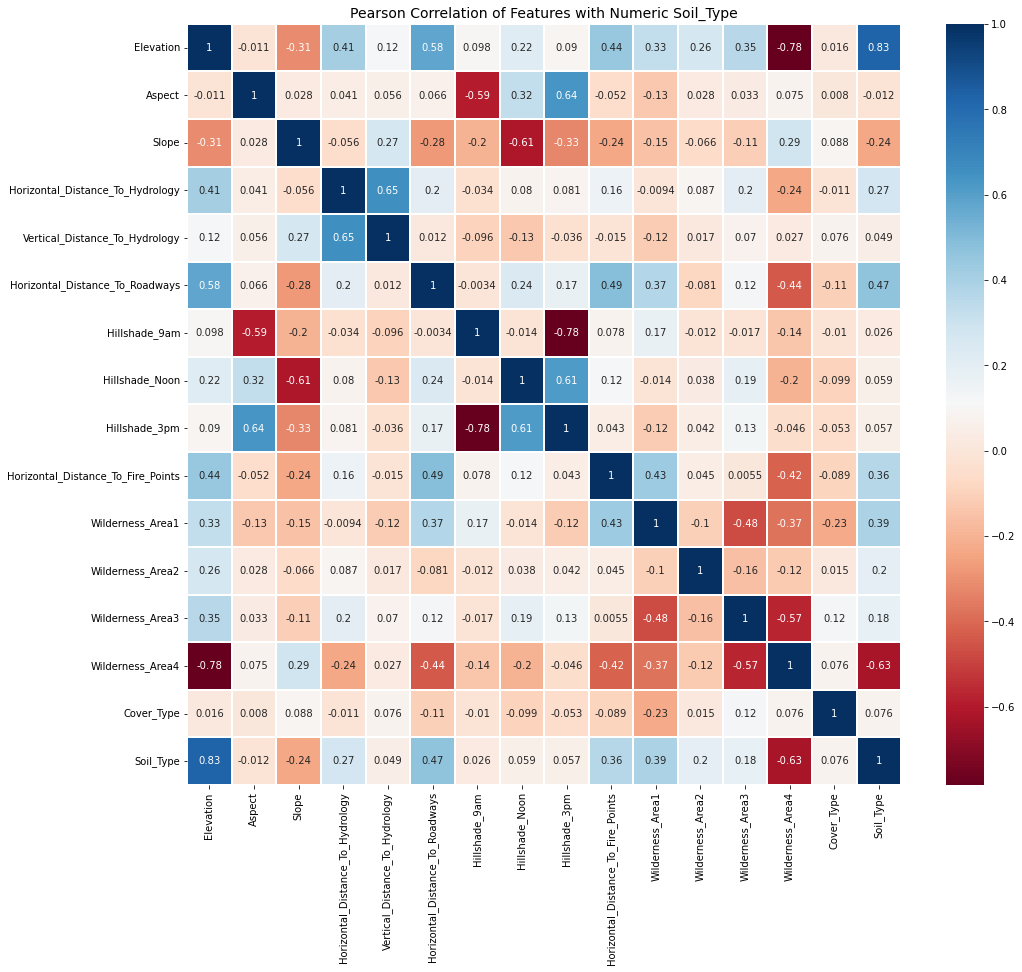

In [129]:
# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(df.corr())

plt.figure(figsize=(16,14))

sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap="RdBu", linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

In [130]:
df_base = df.copy()
df['Mean_Elevation_Vertical_Distance_Hydrology'] = df[['Elevation', 'Vertical_Distance_To_Hydrology']].mean(axis=1)
df['Mean_Distance_Hydrology_Fire_Points'] = df[['Horizontal_Distance_To_Hydrology', 
                                               'Horizontal_Distance_To_Fire_Points']].mean(axis=1)
df['Mean_Distance_Hydrology_Roadways'] = df[['Horizontal_Distance_To_Hydrology', 
                                             'Horizontal_Distance_To_Roadways']].mean(axis=1)
df['Mean_Distance_Firepoints_Roadways'] = df[['Horizontal_Distance_To_Fire_Points', 
                                              'Horizontal_Distance_To_Roadways']].mean(axis=1)

for col in df.columns:
    if df[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            df['sqrt_' + col] = np.sqrt(df[col])

In [131]:
corr_tr = pd.DataFrame(df.corr())
corr_tr = pd.DataFrame(corr_tr["Cover_Type"]).reset_index()

corr_tr.columns = ["Feature", "Correlation with Cover_Type"]
corr_tr = (corr_tr[corr_tr["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
corr_tr

,Feature,Correlation with Cover_Type
29,sqrt_Wilderness_Area1,-0.230117
10,Wilderness_Area1,-0.230117
19,Mean_Distance_Firepoints_Roadways,-0.113834
37,sqrt_Mean_Distance_Firepoints_Roadways,-0.107488
5,Horizontal_Distance_To_Roadways,-0.105662
18,Mean_Distance_Hydrology_Roadways,-0.102820
7,Hillshade_Noon,-0.098905
26,sqrt_Hillshade_Noon,-0.098473
36,sqrt_Mean_Distance_Hydrology_Roadways,-0.090889
9,Horizontal_Distance_To_Fire_Points,-0.089389


In [120]:
new_features = ["Mean_Distance_Firepoints_Roadways", "Mean_Distance_Hydrology_Roadways", 
                "sqrt_Horizontal_Distance_To_Hydrology", "Mean_Distance_Hydrology_Fire_Points", 
                "sqrt_Hillshade_3pm", "sqrt_Slope", "Mean_Elevation_Vertical_Distance_Hydrology"]
remove_base_features = ["Horizontal_Distance_To_Hydrology", "Hillshade_3pm",
                  "Hillshade_9am", #strongly correlated with Hillshade_3pm
                   "Slope"] 
df = pd.concat([df_base.drop(columns=remove_base_features), df[new_features]], axis=1)
df

,Elevation,Aspect,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil_Type,Mean_Distance_Firepoints_Roadways,Mean_Distance_Hydrology_Roadways,sqrt_Horizontal_Distance_To_Hydrology,Mean_Distance_Hydrology_Fire_Points,sqrt_Hillshade_3pm,sqrt_Slope,Mean_Elevation_Vertical_Distance_Hydrology
0,2596,51,0,510,232,6279,1,0,0,0,5,29,3394.5,384.0,16.062378,3268.5,12.165525,1.732051,1298.0
1,2590,56,-6,390,235,6225,1,0,0,0,5,29,3307.5,301.0,14.560220,3218.5,12.288206,1.414214,1292.0
2,2804,139,65,3180,238,6121,1,0,0,0,2,12,4650.5,1724.0,16.370706,3194.5,11.618950,3.000000,1434.5
3,2785,155,118,3090,238,6211,1,0,0,0,2,30,4650.5,1666.0,15.556349,3226.5,11.045361,4.242641,1451.5
4,2595,45,-1,391,234,6172,1,0,0,0,5,29,3281.5,272.0,12.369317,3162.5,12.247449,1.414214,1297.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,7,660,251,1282,0,0,1,0,3,4,971.0,459.0,16.062378,770.0,14.628739,4.795832,1307.0
15116,2603,121,195,618,221,1325,0,0,1,0,3,4,971.5,625.5,25.159491,979.0,9.539392,4.358899,1399.0
15117,2492,134,117,335,220,1187,0,0,1,0,3,4,761.0,350.0,19.104973,776.0,9.110434,5.000000,1304.5
15118,2487,167,101,242,237,932,0,0,1,0,3,4,587.0,230.0,14.764823,575.0,10.908712,5.291503,1294.0


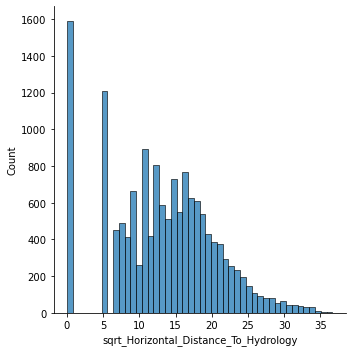

In [134]:
sns.displot(df, x='sqrt_Horizontal_Distance_To_Hydrology')